In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns


In [ ]:
trained_model=None
data_scaler=None
label_encoder=None

In [41]:
data_directory_path='C:/Users/hrith/Downloads/emotion_dataset'
emotion_code_to_label_mapping={'01':'neutral','03':'happy','04':'sad','05':'angry'}


In [ ]:
extracted_feature_list=[]
corresponding_emotion_labels=[]
for root_directory, sub_directories, files_in_dir in os.walk(data_directory_path):
 for file_name in files_in_dir:
  if file_name.endswith('.wav'):
   audio_file_parts=file_name.split('-')
   emotion_code=audio_file_parts[2]
   if emotion_code in emotion_code_to_label_mapping:
    audio_waveform,sample_rate=librosa.load(os.path.join(root_directory,file_name),sr=None)
    mfcc_features=librosa.feature.mfcc(y=audio_waveform,sr=sample_rate,n_mfcc=13)
    averaged_mfcc_features=np.mean(mfcc_features.T,axis=0)
    extracted_feature_list.append(averaged_mfcc_features)
    corresponding_emotion_labels.append(emotion_code_to_label_mapping[emotion_code])


In [ ]:
extracted_feature_array=np.array(extracted_feature_list)
corresponding_emotion_labels_array=np.array(corresponding_emotion_labels)
label_encoder=LabelEncoder()
encoded_labels=label_encoder.fit_transform(corresponding_emotion_labels_array)
data_scaler=StandardScaler()
scaled_feature_array=data_scaler.fit_transform(extracted_feature_array)
    

In [ ]:
training_features,testing_features,training_labels,testing_labels=train_test_split(
 scaled_feature_array,encoded_labels,test_size=0.2,random_state=42)
trained_model=LogisticRegression(max_iter=1000)
trained_model.fit(training_features,training_labels)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.6222222222222222


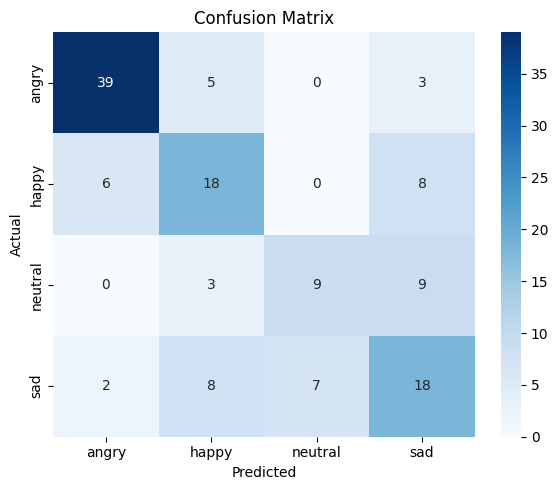

In [53]:
predicted_labels=trained_model.predict(testing_features)
print("Accuracy:",accuracy_score(testing_labels,predicted_labels))
confusion_matrix_result=confusion_matrix(testing_labels,predicted_labels)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix_result,annot=True,fmt='d',cmap='Blues',
 xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [55]:
def test_file(test_audio_path):
 audio_waveform,sample_rate=librosa.load(test_audio_path,sr=None)
 mfcc_features=librosa.feature.mfcc(y=audio_waveform,sr=sample_rate,n_mfcc=13)
 averaged_mfcc_features=np.mean(mfcc_features.T,axis=0).reshape(1,-1)
 scaled_input=data_scaler.transform(averaged_mfcc_features)
 predicted_class=trained_model.predict(scaled_input)
 print("Prediction:",label_encoder.inverse_transform(predicted_class)[0])


In [56]:
test_file(test_audio_path=r'C:\Users\hrith\Downloads\ceeday-sound-effect-hd.wav')

Prediction: angry
